**Objetivo**: Analisar os microdados do ENEM com base em classes e distribuição de frequência.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Carregamento do df completo - colunas especificas
cols = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO', 'TP_ESCOLA']
df = pd.read_csv('../data/MICRODADOS_ENEM_2023.csv', usecols=cols, nrows=10000, encoding='latin1', sep=';').dropna()

In [3]:
# Carregamento de amostra e remoção de valores ausentes
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7257 entries, 2 to 9999
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TP_ESCOLA        7257 non-null   int64  
 1   NU_NOTA_CN       7257 non-null   float64
 2   NU_NOTA_CH       7257 non-null   float64
 3   NU_NOTA_LC       7257 non-null   float64
 4   NU_NOTA_MT       7257 non-null   float64
 5   NU_NOTA_REDACAO  7257 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 396.9 KB


In [4]:
# Criação das classes
bins = [0,100,200,300,400,500,600,700,800,900,1001] # limites das classes 
labels = ['0–99', '100–199', '200–299', '300–399', '400–499','500–599', '600–699', '700–799', '800–899', '900–1000']

In [5]:
# Criação de classes (Ciẽncias da Natureza)
df['Faixa'] = pd.cut(df['NU_NOTA_CN'], bins=bins, labels=labels, right=False, include_lowest=True)

In [6]:
df['Faixa'].unique()

['500–599', '400–499', '600–699', '700–799', '300–399', '0–99', '800–899']
Categories (10, object): ['0–99' < '100–199' < '200–299' < '300–399' ... '600–699' < '700–799' < '800–899' < '900–1000']

In [7]:
# Cálculo de frequência
freq = df['Faixa'].value_counts(sort=False)
freq_acumulada = freq.cumsum()

In [8]:
distribuicao_de_frequencia = pd.DataFrame({
    'Faixa': freq.index,
    'Frequência': freq.values,
    'Frequência Acumulada': freq_acumulada.values
})
distribuicao_de_frequencia

,Faixa,Frequência,Frequência Acumulada
0,0–99,25,25
1,100–199,0,25
2,200–299,0,25
3,300–399,702,727
4,400–499,3286,4013
5,500–599,2687,6700
6,600–699,491,7191
7,700–799,64,7255
8,800–899,2,7257
9,900–1000,0,7257


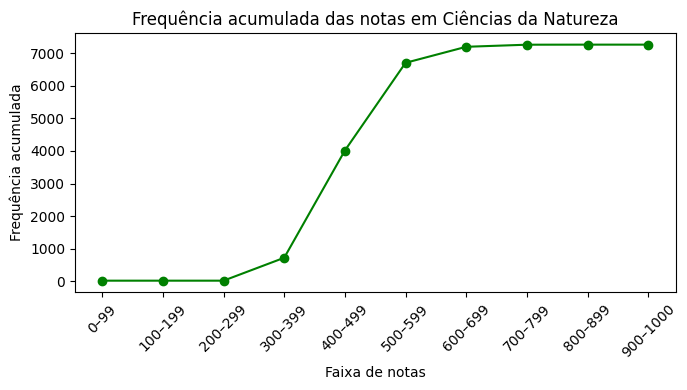

In [17]:
plt.figure(figsize=(7,4))
plt.plot(distribuicao_de_frequencia['Faixa'], distribuicao_de_frequencia['Frequência Acumulada'], marker='o', color='green')
plt.title('Frequência acumulada das notas em Ciências da Natureza')
plt.xlabel('Faixa de notas')
plt.ylabel('Frequência acumulada')
plt.xticks(rotation=45) # Angulo da Faixa de notas
plt.tight_layout()

## Análise da Ogiva – Notas de Ciências da Natureza

A análise da ogiva revelou que a maior parte dos participantes obteve notas entre **400 e 599**, com uma concentração significativa nesse intervalo. A curva apresenta um crescimento acentuado nessa região, indicando que é ali que está o "miolo" da distribuição.

Outro ponto que chama atenção é a **baixa frequência de notas muito altas**: apenas **2 participantes ultrapassaram os 800 pontos**, e **nenhum atingiu mais de 900**. Isso mostra como é raro alcançar desempenho extremamente alto nessa área.

Além disso, observou-se um **vazio completo nas faixas de 100 a 299**, o que levanta dúvidas interessantes:
- Seria um comportamento esperado pelo modelo de correção da prova?
- Existe um corte mínimo de pontuação automática aplicado pelo INEP?
- Ou a escala utilizada (TRI) **não permite** notas tão baixas, mesmo com poucas questões corretas?

Essas lacunas são importantes para entender não só os dados, mas também o **método de avaliação do ENEM**.

➡️ A ogiva, portanto, nos dá uma visão clara da **distribuição acumulada**, facilitando a identificação de **concentração de desempenho**, **ausência de certos valores** e **raridade de notas extremas**.


In [ ]:
plt.figure(figsize=(7,4))
plt.plot(distribuicao_de_frequencia)

In [26]:
# Função para gerar tabela de distribuição de frequência e gráfico de ogiva
def frequencia_e_ogiva (col, titulo):
    
    bins = [0,100,200,300,400,500,600,700,800,900,1001] # limites das classes 
    labels = ['0–99', '100–199', '200–299', '300–399', '400–499','500–599', '600–699', '700–799', '800–899', '900–1000']

    # Gerando faixa de classes
    df['Faixa'] = pd.cut(df[col], bins=bins, labels=labels, include_lowest=True, right=False)

    # Cálculo de frequência
    freq = df['Faixa'].value_counts(sort=False)
    freq_acumulada = freq.cumsum()

    # Tabela de frequência
    tabela = pd.DataFrame({
        'Faixa de notas': freq.index,
        'Frequência': freq.values,
        'Frequência Acumulada': freq_acumulada.values
    })

    # Exibindo a tabela
    print(f'Distribuição de frequência: {titulo}')
    display(tabela)

    #Exibindo o gráfico de ogiva
    plt.figure(figsize=(7,4))
    plt.plot(tabela['Faixa de notas'], tabela['Frequência Acumulada'], marker='o', color='green')
    plt.title(f'Gŕafico de Ogiva: {titulo}')
    plt.xlabel('Faixa de notas')
    plt.ylabel('Frequência acumulada')
    plt.xticks(rotation=45) # Angulo da Faixa de notas
    plt.tight_layout()


Distribuição de frequência: Matemática


,Faixa de notas,Frequência,Frequência Acumulada
0,0–99,25,25
1,100–199,0,25
2,200–299,0,25
3,300–399,1225,1250
4,400–499,2235,3485
5,500–599,1855,5340
6,600–699,1332,6672
7,700–799,477,7149
8,800–899,100,7249
9,900–1000,8,7257


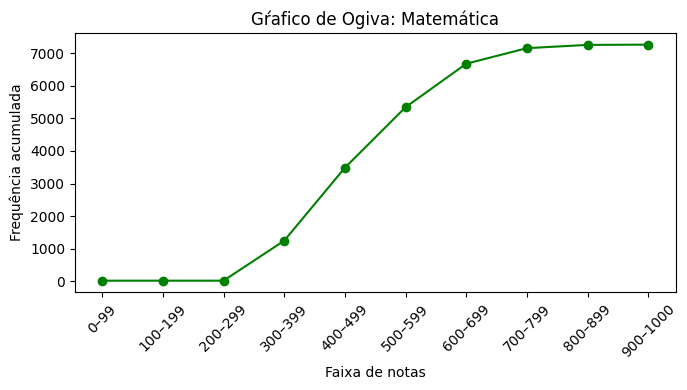

In [27]:
frequencia_e_ogiva('NU_NOTA_MT', 'Matemática')

Distribuição de frequência: Linguagens


,Faixa de notas,Frequência,Frequência Acumulada
0,0–99,3,3
1,100–199,0,3
2,200–299,5,8
3,300–399,336,344
4,400–499,2227,2571
5,500–599,3792,6363
6,600–699,880,7243
7,700–799,14,7257
8,800–899,0,7257
9,900–1000,0,7257


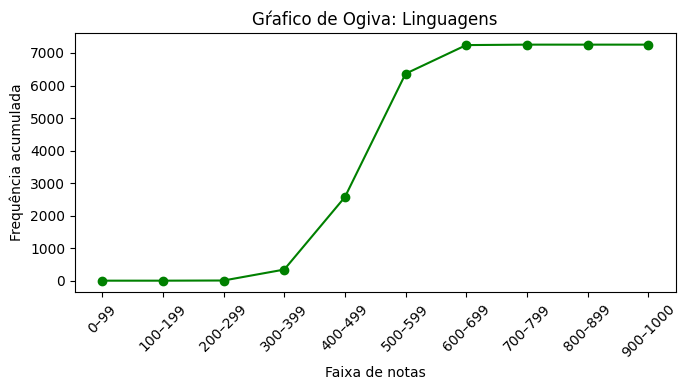

In [28]:
frequencia_e_ogiva('NU_NOTA_LC', 'Linguagens')

Distribuição de frequência: Ciências Humanas


,Faixa de notas,Frequência,Frequência Acumulada
0,0–99,3,3
1,100–199,0,3
2,200–299,1,4
3,300–399,478,482
4,400–499,1868,2350
5,500–599,3527,5877
6,600–699,1307,7184
7,700–799,72,7256
8,800–899,1,7257
9,900–1000,0,7257


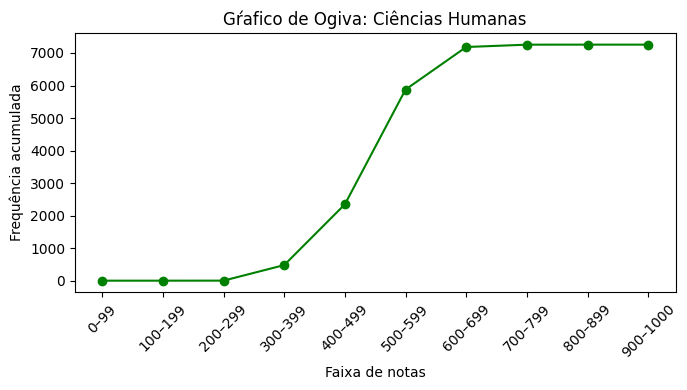

In [29]:
frequencia_e_ogiva('NU_NOTA_CH', 'Ciências Humanas')

Distribuição de frequência: Redação


,Faixa de notas,Frequência,Frequência Acumulada
0,0–99,143,143
1,100–199,5,148
2,200–299,76,224
3,300–399,349,573
4,400–499,690,1263
5,500–599,1413,2676
6,600–699,1448,4124
7,700–799,1018,5142
8,800–899,1150,6292
9,900–1000,965,7257


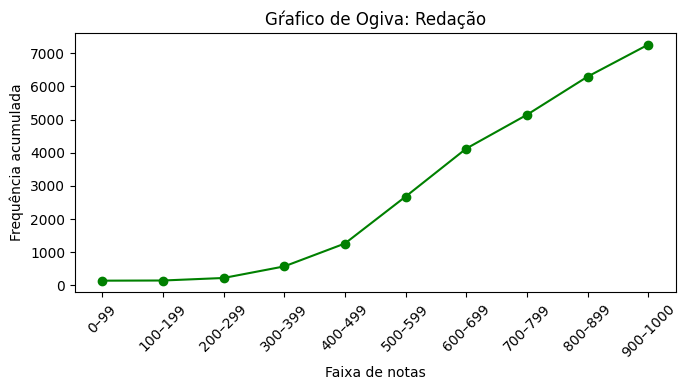

In [30]:
frequencia_e_ogiva('NU_NOTA_REDACAO', 'Redação')